In [1]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import datetime, string, re
import sys

import tweepy

from collections import Counter

print('All Libraries Sucessfully Imported')

All Libraries Sucessfully Imported


In [2]:

traffic_record = pd.read_csv("data_traffic/nypd_collisions_report.csv", index_col= None, header = None)

traffic_record

/Users/doguma/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3,4,5,10,11,12,13,14,15,16,17,22,23,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1,12/05/2020,0:10,QUEENS,11378,NaN,NaN,NaN,53th St,Flushing Ave,NaN,...,NaN,NaN,NaN,NaN,4373608,Sedan,NaN,NaN,NaN,NaN
2,12/05/2020,14:15,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4373557,Sedan,Sedan,NaN,NaN,NaN
3,12/05/2020,21:30,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,NaN,NaN,NaN,NaN,4373696,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,12/03/2020,0:00,NaN,NaN,NaN,NaN,NaN,BELT PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4372999,Sedan,Motorcycle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737293,07/07/2012,11:50,MANHATTAN,10013,40.7211,-73.9982,"(40.7210624, -73.9981962)",LAFAYETTE STREET,BROOME STREET,NaN,...,Unspecified,NaN,NaN,NaN,5337,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1737294,07/04/2012,15:05,QUEENS,11375,40.7323,-73.8467,"(40.7322824, -73.8466659)",65 AVENUE,110 STREET,NaN,...,Unspecified,NaN,NaN,NaN,264100,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1737295,07/02/2012,12:49,BRONX,10462,40.8343,-73.8579,"(40.8343132, -73.857908)",PUGSLEY AVENUE,BENEDICT AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,80844,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,VAN,NaN,NaN
1737296,07/09/2012,14:00,QUEENS,11361,40.7576,-73.7736,"(40.757647, -73.7735748)",OCEANIA STREET,45 DRIVE,NaN,...,Unspecified,NaN,NaN,NaN,259423,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [3]:
traffic_record.dropna(thresh=len(traffic_record.index)/2, axis=1, inplace=True)
# drop columns if more than half of elements are NaN

traffic_record = traffic_record.dropna(subset=[4,5])
# drop rows if latitude or longitude values are NaN

traffic_record.columns = traffic_record.iloc[0]
# add first row as column names
traffic_record.drop(traffic_record.head(1).index,inplace=True)
# remove redundant first row

traffic_record2 = traffic_record.reset_index(drop=True)
# reset row index

traffic_record

/Users/doguma/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
5,12/03/2020,13:45,BROOKLYN,11217,40.686646,-73.97982,"(40.686646, -73.97982)",SCHERMERHORN STREET,3 AVENUE,0,...,0,0,0,0,0,Unsafe Speed,Unspecified,4373501,Taxi,NaN
6,12/01/2020,13:55,QUEENS,11433,40.70793,-73.78383,"(40.70793, -73.78383)",JAMAICA AVENUE,177 STREET,0,...,0,0,0,0,0,Unspecified,NaN,4372356,Sedan,NaN
8,12/01/2020,8:30,MANHATTAN,10032,40.84031,-73.93849,"(40.84031, -73.93849)",NaN,NaN,0,...,0,0,0,0,0,Driver Inattention/Distraction,Passing Too Closely,4372843,Sedan,Sedan
9,11/30/2020,1:10,STATEN ISLAND,10305,40.59742,-74.06836,"(40.59742, -74.06836)",MCCLEAN AVENUE,WALLACE AVENUE,0,...,0,0,0,0,0,Unspecified,NaN,4371841,Sedan,NaN
11,11/29/2020,11:55,NaN,NaN,40.844955,-73.93008,"(40.844955, -73.93008)",HARLEM RIVER DRIVE,NaN,0,...,0,0,0,0,0,Unsafe Speed,NaN,4371752,Sedan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737293,07/07/2012,11:50,MANHATTAN,10013,40.7211,-73.9982,"(40.7210624, -73.9981962)",LAFAYETTE STREET,BROOME STREET,0,...,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,5337,PASSENGER VEHICLE,PASSENGER VEHICLE
1737294,07/04/2012,15:05,QUEENS,11375,40.7323,-73.8467,"(40.7322824, -73.8466659)",65 AVENUE,110 STREET,0,...,0,0,0,0,0,Prescription Medication,Unspecified,264100,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON
1737295,07/02/2012,12:49,BRONX,10462,40.8343,-73.8579,"(40.8343132, -73.857908)",PUGSLEY AVENUE,BENEDICT AVENUE,1,...,0,0,0,1,0,Unspecified,Unspecified,80844,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON
1737296,07/09/2012,14:00,QUEENS,11361,40.7576,-73.7736,"(40.757647, -73.7735748)",OCEANIA STREET,45 DRIVE,0,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,259423,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON


In [10]:
traffic_record2['CRASH DATE'] = pd.to_datetime(traffic_record2['CRASH DATE'])
traffic_record2['CRASH DATE'] = traffic_record2['CRASH DATE'].dt.date
# change 'crash date' column to datetime format

traffic_record4 = traffic_record2[(traffic_record2['CRASH DATE']>datetime.date(2020,6,1)) & (traffic_record2['CRASH DATE']<datetime.date(2020,9,1))]  
# query the dates from 2020/06/01 to 2020/12/01

traffic_record2['CRASH DATE']


3        2020-11-30
4        2020-11-29
5        2020-11-28
6        2020-11-28
7        2020-11-27
            ...    
60963    2020-06-18
60966    2020-06-11
60967    2020-06-06
60970    2020-06-22
60973    2020-06-14
Name: CRASH DATE, Length: 50337, dtype: object

In [6]:
traffic_record2.to_csv('accident_Jun_Nov_2020.csv', mode="a")
traffic_record3.to_csv('accident_Jun_2020.csv', mode="a")

In [11]:
traffic_record4.to_csv('accident_Jun_Aug_2020.csv', mode="a")

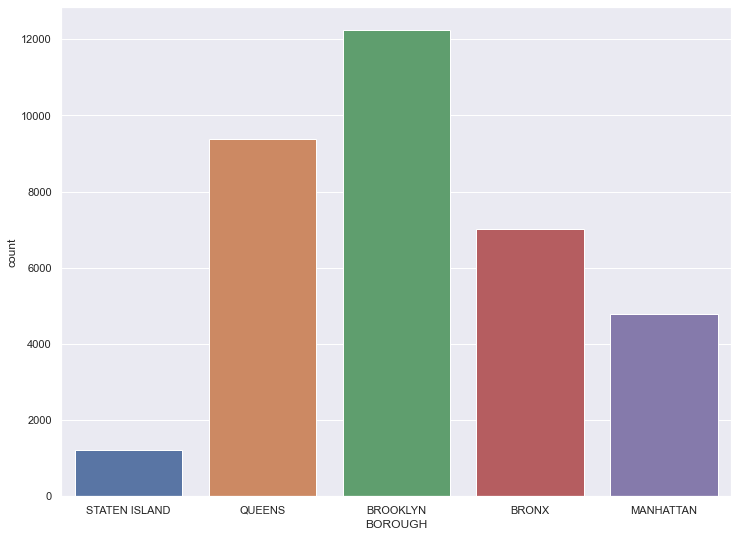

In [44]:
plt.figure(figsize=(12,9))
sns.set(style="darkgrid")
ax = sns.countplot(x='BOROUGH', data=traffic_record2) 

In [39]:
traffic_record2['LATITUDE'] = traffic_record2['LATITUDE'].apply(lambda x: float(x))
traffic_record2['LONGITUDE'] = traffic_record2['LONGITUDE'].apply(lambda x: float(x))
# change the column values to float format

traffic_record3 = traffic_record2.drop(traffic_record2[(traffic_record2['LATITUDE'] < 30) & (traffic_record2['LONGITUDE'] > -60)].index)
# drop outliers

<ipython-input-39-c186143bb3dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_record2['LATITUDE'] = traffic_record2['LATITUDE'].apply(lambda x: float(x))
<ipython-input-39-c186143bb3dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_record2['LONGITUDE'] = traffic_record2['LONGITUDE'].apply(lambda x: float(x))


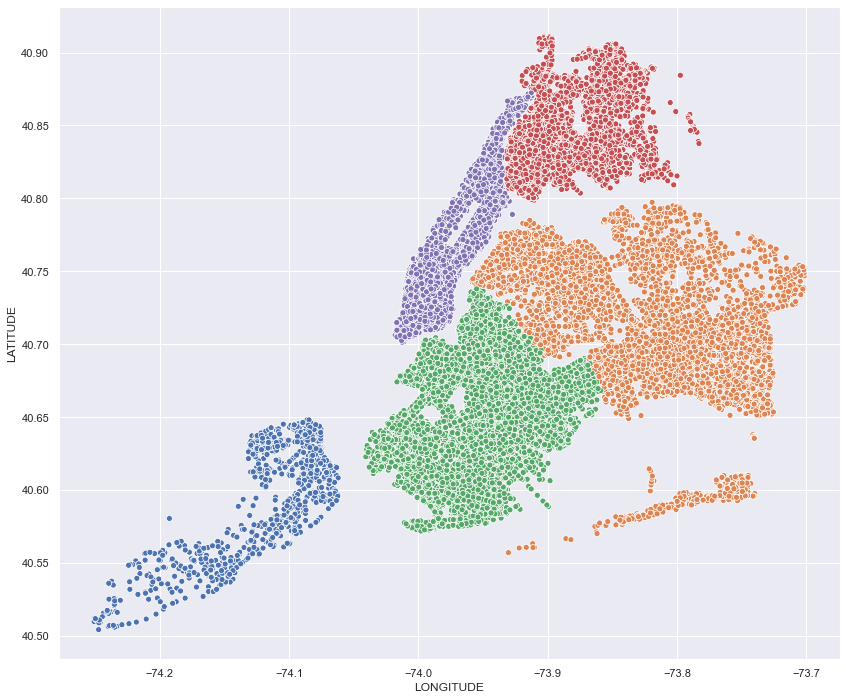

In [45]:

plt.figure(figsize=(14,12))
sns.set(style="darkgrid")

sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=traffic_record3, hue='BOROUGH', legend=False)  
plt.show()
